#The Time Value of Money | Part 1

In [ ]:
# Build EAR function

def calc_ear(periodic_rate, compounding_frequency):
    """
    Calculates the Effective Annual Rate (EAR).

    Parameters:
    periodic_rate (float): The periodic interest rate (e.g., monthly rate).
    compounding_frequency (int): The number of compounding periods per year.

    Returns:
    float: The Effective Annual Rate (EAR).
    """
    ear = (1 + periodic_rate/compounding_frequency) ** compounding_frequency - 1
    return ear

In [ ]:
calc_ear(0.08, 1)

0.08000000000000007

In [ ]:
#Computing EARs for a range of compounding frequencies
semiannual_ear = calc_ear(0.1,2)
quarterly_ear = calc_ear(0.1,4)
monthly_ear = calc_ear(0.1,12)
daily_ear = calc_ear(0.1,365)

print(semiannual_ear)
print(quarterly_ear)
print(monthly_ear)
print(daily_ear)

0.10250000000000004
0.10381289062499954
0.10471306744129683
0.10515578161623251


In [ ]:
def future_value(principal, years, periodic_rate, m):
    """
    Parameters:
    principal (int): the initial investment amount
    years (int): the number of years to invest

    Returns:
    float: The future value of the investment.
    """
    # Calculate the Effective Annual Rate (EAR) using the calculate_ear function
    def calculate_ear(periodic_rate, m):
        """
        Parameters:
        periodic_rate (float): stated annual rate/m
        m (int): the number of compounding periods per year

        Returns:
        float: The Effective Annual Rate (EAR).
        """
        ear = (1 + periodic_rate/m) ** m
        return ear

    # Calculate the future value
    ear = calculate_ear(periodic_rate, m)
    fv = principal * ear ** years

    return fv

In [ ]:
def calc_fv(principal, years, periodic_rate, compounding_frequency):
    """
    Calculates the future value of an investment.

    Parameters:
    principal (float): The initial investment amount.
    years (int): The number of years to invest.
    periodic_rate (float): The periodic interest rate (e.g., monthly rate).
    compounding_frequency (int): The number of compounding periods per year.

    Returns:
    float: The future value of the investment.
    """

    def calc_ear(periodic_rate, compounding_frequency):
        """
        Calculates the Effective Annual Rate (EAR).

        Parameters:
        periodic_rate (float): The periodic interest rate.
        compounding_frequency (int): The number of compounding periods per year.

        Returns:
        float: The Effective Annual Rate (EAR).
        """
        ear = (1 + periodic_rate / compounding_frequency) ** compounding_frequency
        return ear

    # Calculate the future value
    ear = calc_ear(periodic_rate, compounding_frequency)
    future_value = principal * ear ** years

    return future_value

In [ ]:
def calc_pv(principal, years, periodic_rate, compounding_frequency):
    """
    Calculates the future value of an investment.

    Parameters:
    principal (float): The initial investment amount.
    years (int): The number of years to invest.
    periodic_rate (float): The periodic interest rate (e.g., monthly rate).
    compounding_frequency (int): The number of compounding periods per year.

    Returns:
    float: The future value of the investment.
    """

    def calc_ear(periodic_rate, compounding_frequency):
        """
        Calculates the Effective Annual Rate (EAR).

        Parameters:
        periodic_rate (float): The periodic interest rate.
        compounding_frequency (int): The number of compounding periods per year.

        Returns:
        float: The Effective Annual Rate (EAR).
        """
        ear = (1 + periodic_rate / compounding_frequency) ** compounding_frequency
        return ear

    # Calculate the future value
    ear = calc_ear(periodic_rate, compounding_frequency)
    present_value = principal / ear ** years

    return present_value

In [ ]:
import math

def calc_periods(present_value, future_value, period_rate):
    """
    Calculate the number of periods required to achieve the future value given the present value and interest rate.

    :param present_value: The present value (PV)
    :param future_value: The future value (FV)
    :param period_rate: The interest rate per period (r)
    :return: The number of periods (n)
    """
    if present_value <= 0 or future_value <= 0 or period_rate <= 0:
      raise ValueError("All inputs must be greater than zero.")

    periods = math.log(future_value / present_value) / math.log(1 + period_rate)
    return periods

In [ ]:
import pandas as pd
# Define compounding periods
m_values = [1, 2, 4, 12, 365]

# Create an empty list to store results
results = []

# Calculate and store results
for m in m_values:
    pv = present_value(principal=200, years=2, periodic_rate=0.10, m=m)
    interest_earned = 200 - pv
    results.append([m, pv, interest_earned])

# Create a Pandas DataFrame
df = pd.DataFrame(results, columns=['Compounding_Period', 'Present_Value', 'Interest_Earned'])

# Display the DataFrame
display(df)

,Compounding_Period,Present_Value,Interest_Earned
0,1,165.289256,34.710744
1,2,164.540495,35.459505
2,4,164.149314,35.850686
3,12,163.881909,36.118091
4,365,163.750636,36.249364


In [ ]:
def present_value_dynamic(principal, years, periodic_rate, m):

    def calculate_ear(periodic_rate, m):
        ear = (1 + periodic_rate / m) ** m
        return ear

    # Total number of periods
    # Convert years to an integer to ensure total_periods is an integer
    total_periods = int(years * m)

    # Initialize lists to store values
    periods = []
    present_values = []  # Changed from principals to present_values
    interests_earned = []

    # Starting principal
    current_principal = principal

    # Effective Annual Rate
    ear = calculate_ear(periodic_rate, m)

    # Loop through each period
    for period in range(1, total_periods + 1):
        # Calculate the present value for the current period
        pv = principal / (ear ** (period / m))  # Calculate PV for each period

        # Calculate interest earned for the period
        interest_earned = principal - pv  # Interest earned is principal - PV
        present_values.append(pv)
        interests_earned.append(interest_earned)
        periods.append(period)

    # Create DataFrame from the lists
    df = pd.DataFrame({
        'Period': periods,
        'Present_Value': present_values,
        'Interest_Earned': interests_earned,
    })

    return df

In [ ]:
present_value_dynamic(242,2,0.1,1)

,Period,Present_Value,Interest_Earned
0,1,220.0,22.0
1,2,200.0,42.0


In [ ]:
def future_value_dynamic(principal, years, periodic_rate, m):
    """
    Calculates and returns a DataFrame showing the dynamic changes in
    principal and interest earned over time for a given compounding frequency.

    Parameters:
    principal (int): the initial investment amount
    years (int): the number of years to invest
    periodic_rate (float): stated annual rate/m
    m (int): the number of compounding periods per year

    Returns:
    pd.DataFrame: A DataFrame with columns 'Period', 'Principal', 'Interest_Earned',
                  'Total_Value' showing the dynamic changes over time.
    """

    def calculate_ear(periodic_rate, m):
        """
        Calculates the Effective Annual Rate (EAR).
        """
        ear = (1 + periodic_rate/m) ** m
        return ear

    # Total number of periods
    total_periods = int(years * m)

    # Initialize lists to store values
    periods = []
    principals = []
    interests_earned = []

    # Starting principal
    current_principal = principal

    # Loop through each period
    for period in range(1, total_periods + 1):
        # Calculate interest earned for the period
        interest_earned = current_principal * (periodic_rate / m)

        # Update principal
        current_principal += interest_earned

        # Append values to lists
        periods.append(period)
        principals.append(current_principal)
        interests_earned.append(interest_earned)

    # Create DataFrame from the lists
    df = pd.DataFrame({
        'Period': periods,
        'Principal': principals,
        'Interest_Earned': interests_earned,
    })

    return df

In [ ]:
present_value(242, 2, 0.1, 1)

199.99999999999997

#The Time Value of Money | Annuities

In [ ]:
def calculate_annuity_pv(pmt, r, n, annuity_type="ordinary", defer_periods=0):
    """
    Calculate the Present Value of different types of annuities.

    Parameters:
    - pmt: float - Payment per period
    - r: float - Interest rate per period (decimal, e.g., 0.05 for 5%)
    - n: int - Number of payments
    - annuity_type: str - "ordinary", "due", or "deferred"
    - defer_periods: int - Delay in payments (used only for deferred annuity)

    Returns:
    - float - Present Value of the annuity
    """
    if annuity_type not in ["ordinary", "due", "deferred"]:
        raise ValueError("annuity_type must be 'ordinary', 'due', or 'deferred'")

    # Base annuity present value
    pv = pmt * (1 - (1 + r) ** -n) / r

    if annuity_type == "due":
        pv *= (1 + r)  # Shift one period earlier
    elif annuity_type == "deferred":
        pv /= (1 + r) ** defer_periods  # Discount back from deferred start

    return pv


In [ ]:
# Inputs
r = 0.05
n = 15

# Calculate for all types
pv_due = calculate_annuity_pv(100000, r, n, annuity_type="due")
pv_ordinary = calculate_annuity_pv(110000, r, n, annuity_type="ordinary")
pv_deferred = calculate_annuity_pv(120000, r, n, annuity_type="deferred", defer_periods=4)

# Output
print(f"Annuity Due PV: ${pv_due:,.2f}")
print(f"Ordinary Annuity PV: ${pv_ordinary:,.2f}")
print(f"Deferred Annuity PV: ${pv_deferred:,.2f}")

Annuity Due PV: $1,089,864.09
Ordinary Annuity PV: $1,141,762.38
Deferred Annuity PV: $1,024,724.44


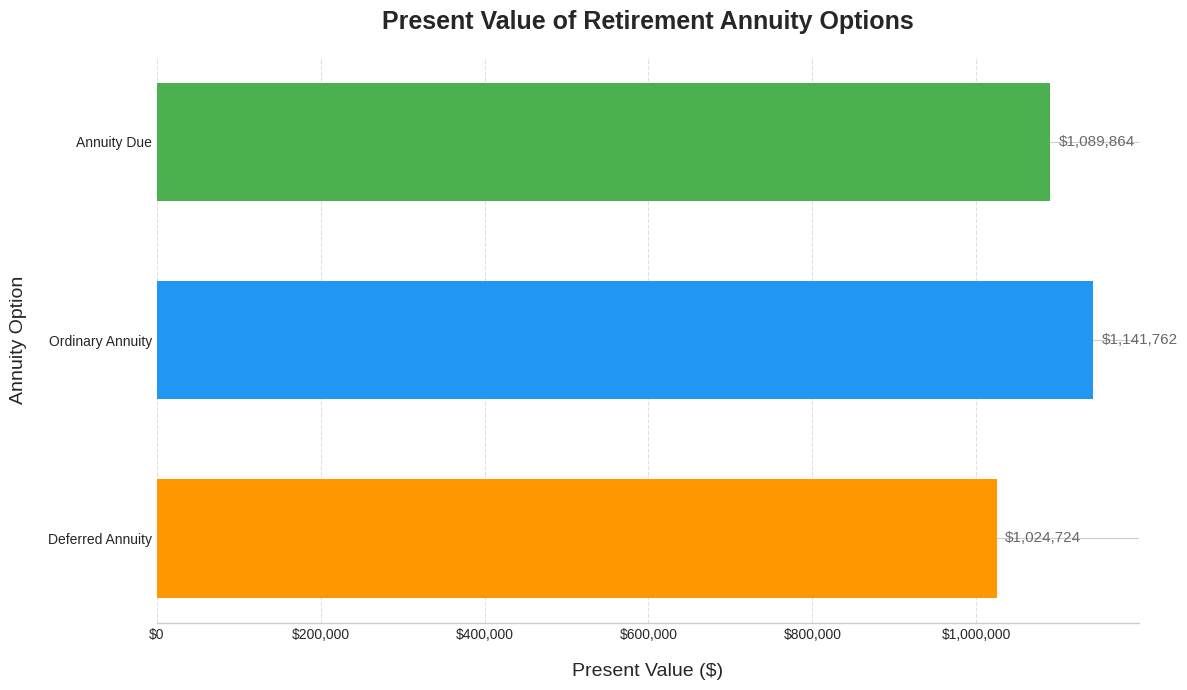

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use a different style for a more polished look
plt.style.use('seaborn-v0_8-whitegrid')

# Data for plotting
annuity_pvs = {
    "Annuity Due": pv_due,
    "Ordinary Annuity": pv_ordinary,
    "Deferred Annuity": pv_deferred
}

labels = list(annuity_pvs.keys())
values = list(annuity_pvs.values())
colors = ['#4CAF50', '#2196F3', '#FF9800'] # More visually appealing colors

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(labels, values, color=colors, height=0.6) # Adjust bar height

# Add value labels to the bars with better formatting
for bar in bars:
    width = bar.get_width()
    ax.text(width + (width * 0.01), bar.get_y() + bar.get_height()/2, f'${width:,.0f}', va='center', ha='left', fontsize=11, color='dimgray') # Add some padding and format to whole numbers

# Set chart title and labels with improved fonts
ax.set_title('Present Value of Retirement Annuity Options', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Present Value ($)', fontsize=14, labelpad=15)
ax.set_ylabel('Annuity Option', fontsize=14, labelpad=15)
ax.invert_yaxis() # Display the highest value at the top

# Customize grid appearance
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}')) # Format x-axis labels as currency

# Remove spines for a cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#The Time Value of Money | Perpetuities

In [ ]:
def calculate_perpetuity(pmt, rate, defer_years=0):
    """
    Calculate the present value of a perpetuity or deferred perpetuity.

    Parameters:
    - pmt (float): Fixed periodic payment
    - rate (float): Discount rate (as a decimal, e.g., 8% = 0.08)
    - defer_years (int): Number of years until the first payment (default is 0)

    Returns:
    - float: Present value of the perpetuity
    """
    if rate <= 0:
        raise ValueError("Discount rate must be greater than zero.")

    # Present value at the time just before first payment
    pv = pmt / rate

    # If deferred, discount back to present
    if defer_years > 0:
        pv /= (1 + rate) ** defer_years

    return round(pv, 2)


In [ ]:
calculate_perpetuity(5, 0.08)

62.5

In [ ]:
calculate_perpetuity(5, 0.08, 3)

49.61